
# 🧠 Complete Numerical Walkthrough: L1 Regularization in Neural Networks

This notebook demonstrates the mathematical flow of L1 regularization using a simplified example with a $( 2 \times 2 )$ weight matrix.

We will compute:
1. The total loss with L1 penalty
2. The combined gradients
3. The updated weights after a gradient descent step

---



## 🧾 Initial Setup

Given:
- Weight matrix $( W \in \mathbb{R}^{2 \times 2} )$
- Regularization strength $( \lambda = 0.01 )$
- Learning rate $( \eta = 0.1 )$
- Base loss $( L = 0.52 )$
- Gradient from base loss:

$
\nabla L =
\begin{bmatrix}
0.02 & -0.01 \\
0.03 & -0.04
\end{bmatrix}
$

Weight matrix:

$
W =
\begin{bmatrix}
0.8 & -0.3 \\
0.0 & 0.5
\end{bmatrix}
$



## 📐 Step 1: Compute L1 Regularization Penalty

$ \sum |w_{ij}| = |0.8| + |-0.3| + |0.0| + |0.5| = 1.6 $



## 🔢 Step 2: Compute Total Loss with Regularization

$
L_{\text{new}} = L + \lambda \sum |w_{ij}| = 0.52 + 0.01 \times 1.6 = 0.536 $



## 🔁 Step 3: Compute Total Gradient

Gradient of the L1 penalty:

$
\lambda \cdot \text{sign}(W) =
0.01 \cdot
\begin{bmatrix}
1 & -1 \\
0 & 1
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.01 & -0.01 \\
0.00 & 0.01
\end{bmatrix}
$

Total gradient:

$
\nabla L_{\text{new}} =
\begin{bmatrix}
0.02 & -0.01 \\
0.03 & -0.04
\end{bmatrix}
$
$+$
$
\begin{bmatrix}
0.01 & -0.01 \\
0.00 & 0.01
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.03 & -0.02 \\
0.03 & -0.03
\end{bmatrix}
$



## ⬇️ Step 4: Perform Weight Update

Using learning rate $( \eta = 0.1 )$:

$
W_{\text{new}} = W - \eta \cdot \nabla L_{\text{new}}
$

Gradient step:

$
0.1 \cdot \nabla L_{\text{new}} =
\begin{bmatrix}
0.003 & -0.002 \\
0.003 & -0.003
\end{bmatrix}
$

Updated weights:

$
W_{\text{new}} =
\begin{bmatrix}
0.8 & -0.3 \\
0.0 & 0.5
\end{bmatrix}
$
$-$
$
\begin{bmatrix}
0.003 & -0.002 \\
0.003 & -0.003
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.797 & -0.298 \\
-0.003 & 0.503
\end{bmatrix}
$



## ✅ Summary Table

| Component                        | Value / Matrix                                       |
|----------------------------------|------------------------------------------------------|
| Base Loss \( L \)               | 0.52                                                 |
| L1 Penalty $\sum w_{ij}$  | 1.6                                                  |
| Regularized Loss $( L_{\text{new}} )$ | 0.536                                            |
| Gradient of base loss $ \nabla L $ | $ \begin{bmatrix} 0.02 & -0.01 \\ 0.03 & -0.04 \end{bmatrix} $ |
| Gradient of L1 penalty $ \lambda \cdot \text{sign}(W) $ | $ \begin{bmatrix} 0.01 & -0.01 \\ 0.00 & 0.01 \end{bmatrix} $ |
| Total Gradient $\nabla L_{\text{new}} $ | $\begin{bmatrix} 0.03 & -0.02 \\ 0.03 & -0.03 \end{bmatrix} $ |
| Updated Weights $ W_{\text{new}} $ | $ \begin{bmatrix} 0.797 & -0.298 \\ -0.003 & 0.503 \end{bmatrix} $ |



---

## 🔍 Key Insights

- The regularized loss $ L_{\text{new}} = 0.536 $ includes the penalty from L1, not just the prediction error.
- The gradient used in the update step comes from $ L_{\text{new}} $, including both prediction and regularization terms.
- L1 regularization encourages **sparsity** by nudging weights toward zero.
- The regularization effect is visible even in this small update step.

---


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random

## 📥 Load and Preprocess the MNIST Dataset

In [2]:

# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images for dense input
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# Split validation set from training data
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [3]:

# Take only 1000 training samples
x_small_train = x_train[:300]
y_small_train = y_train[:300]


[0 1 2 3 4 5 6 7 8 9] [34 39 28 34 32 23 29 29 21 31]


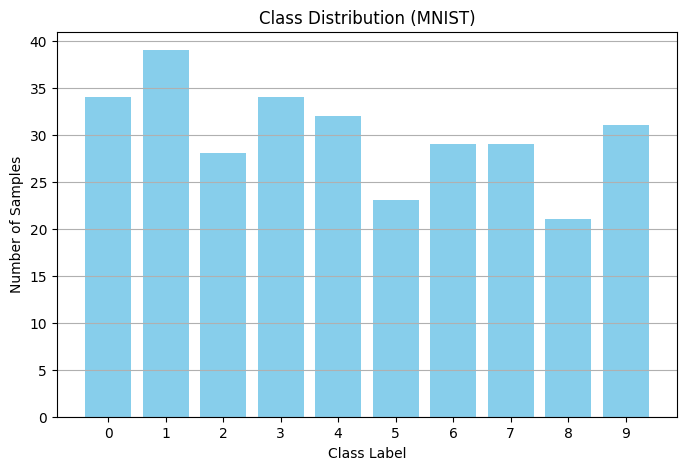

In [4]:
# Plot the bar chart
classes, counts = np.unique(y_small_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()

## 🏗️ Define a Neural Network with L1 Regularization

In [5]:

# def create_model_l1(lambda_val=0.0005):
#     model = models.Sequential([
#         layers.Input(shape=(784,)),
#         layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
#         layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
#         layers.Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# model = create_model_l1()


def overfitting_model_l1(lambda_val=0.0005):
    model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = overfitting_model_l1()


## 🚂 Train the Model

In [6]:

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/50
391/391 - 13s - 34ms/step - accuracy: 0.8757 - loss: 4.0945 - val_accuracy: 0.9222 - val_loss: 1.3596
Epoch 2/50
391/391 - 12s - 31ms/step - accuracy: 0.9260 - loss: 1.0741 - val_accuracy: 0.9416 - val_loss: 0.8565
Epoch 3/50
391/391 - 12s - 29ms/step - accuracy: 0.9404 - loss: 0.7706 - val_accuracy: 0.9473 - val_loss: 0.6831
Epoch 4/50
391/391 - 11s - 29ms/step - accuracy: 0.9471 - loss: 0.6377 - val_accuracy: 0.9509 - val_loss: 0.5882
Epoch 5/50
391/391 - 11s - 29ms/step - accuracy: 0.9518 - loss: 0.5666 - val_accuracy: 0.9592 - val_loss: 0.5219
Epoch 6/50
391/391 - 11s - 29ms/step - accuracy: 0.9550 - loss: 0.5213 - val_accuracy: 0.9628 - val_loss: 0.4886
Epoch 7/50
391/391 - 11s - 29ms/step - accuracy: 0.9579 - loss: 0.4864 - val_accuracy: 0.9591 - val_loss: 0.4754
Epoch 8/50
391/391 - 11s - 29ms/step - accuracy: 0.9576 - loss: 0.4681 - val_accuracy: 0.9558 - val_loss: 0.4668
Epoch 9/50
391/391 - 11s - 29ms/step - accuracy: 0.9602 - loss: 0.4486 - val_accuracy: 0.9591 - 

## 📊 Plot Training and Validation Curves

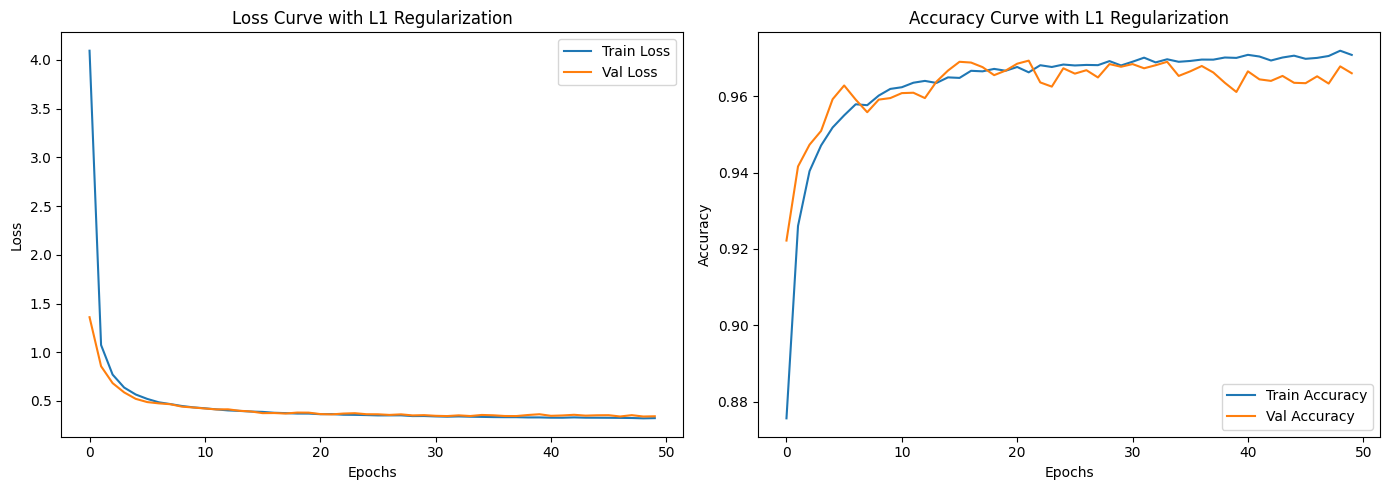

In [7]:

def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve with L1 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve with L1 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [8]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9596 - loss: 0.3641
[7 2 1 0 4 1 4 9 5 9]
Accuracy: 0.9643, Loss: 0.3430
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 2 1 0 4 1 4 9 6 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.94      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.94      0.97      0.95       892
           6       0.94      0.99      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.94      0.96       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




## 🔍 Observation

- L1 regularization introduces a penalty that prevents the weights from growing too large.
- It encourages sparsity in the model, which helps reduce overfitting.
- Try adjusting the value of `lambda_val` to see how the strength of regularization impacts performance.

---
